Uma empresa de telecom gostaria de melhorar os seus resultados financeiros atuando na
retenção de seus clientes, para isso ela necessita entender o perfil dos usuários com maior
propensão a churn e construir uma jornada para garantir a continuidade deste usuário.
Com base neste desafio:
1) Quais as características que aumentam o risco de churn?
2) Qual seria sua proposta para reter os usuários?
Expectativa de entrega:
1. Construir material contemplando os insights, modelos e resultados.
2. Material utilizado para análise (códigos, etc)

- **Customer ID:** A unique ID that identifies each customer

- **Gender:** The customer's gender: Male, Female

- **Age:** The customer's current age, in years, at the time the fiscal quarter ended (Q2 2022)

- **Married:** Indicates if the customer is married: Yes, No

- **Number of Dependents:** Indicates the number of dependents that live with the customer (dependents could be children,parents, etc)

- **City:** The city of the customer's primary residence in California

- **Zip Code:** The zip code of the customer's primary residence

- **Latitude:** The latitude of the customer's primary residence

- **Longitude:** The longitude of the customer's primary residence

- **Number of Referrals:** Indicates the number of times the customer has referred a friend or family member to this company to date

- **Tenure in Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified

- **Offer:** Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E

- **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

- **Avg Monthly Long Distance Charges:** Indicates the customer's average long distance charges, calculated to the end of the quarter specified above

- **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

- **Internet Service:** Indicates if the customer subscribes to Internet service with the company: Yes, No

- **Internet Type:** Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable

- **Avg AVG Monthly GB Download:** Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above

- **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

- **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

- **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment

- **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced

- **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider at no

- **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee:Yes, No

- **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee:Yes, No

- **Unlimited Data:** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No

- **Contract:**: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year

- **Paperless Billing:**: Indicates if the customer has chosen paperless billing: Yes, No

- **Payment Method:**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

- **Monthly Charge:**: Indicates the customer's current total monthly charge for all their services from the company

- **Total Charges:**: Indicates the customer's total charges, calculated to the end of the quarter specified above

- **Total Refunds:**: Indicates the customer's total refunds, calculated to the end of the quarter specified above

- **Total Extra Data Charges:**: Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the

- **Total Long Distance Charges:**: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter

- **Total Revenue:**: Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above

- **Customer Status:**: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

- **Churn Category:**: A high-level category for the customer's reason for churning, which is asked when they leave the company

- **Churn Reason:**: A customer's specific reason for leaving the company, which is asked when they leave the company


# Pacotes e leitura dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score



In [2]:
df = pd.read_excel("telecom_customer_churn.xlsx")

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Customer ID,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS
Gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female
Age,37,46,50,78,75,23,67,52,68,43
Married,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
Number of Dependents,0,0,0,0,0,3,0,0,0,1
City,Frazier Park,Glendale,Costa Mesa,Martinez,Camarillo,Midpines,Lompoc,Napa,Simi Valley,Sheridan
Zip Code,93225,91206,92627,94553,93010,95345,93437,94558,93063,95681
Latitude,34827662,34162515,33645672,38014457,34227846,37581496,34757477,38489789,34296813,38984756
Longtitude,-118999073.0,-118203869.0,-117922613.0,-122115432.0,-119079903.0,-119972762.0,-120550507.0,-12227011.0,-118685703.0,-121345074.0
Number of Referrals,2,0,0,1,3,0,1,8,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer ID                            7043 non-null   object 
 1   Gender                                 7043 non-null   object 
 2   Age                                    7043 non-null   int64  
 3   Married                                7043 non-null   object 
 4   Number of Dependents                   7043 non-null   int64  
 5   City                                   7043 non-null   object 
 6   Zip Code                               7043 non-null   int64  
 7   Latitude                               7043 non-null   int64  
 8   Longtitude                             7043 non-null   float64
 9   Number of Referrals                    7043 non-null   int64  
 10  Tenure in Months                       7043 non-null   int64  
 11  Offe

# Limpeza e estruturação dos dados

#### Informações sobre os dados faltantes

In [5]:
df.isnull().sum()

Customer ID                                 0
Gender                                      0
Age                                         0
Married                                     0
Number of Dependents                        0
City                                        0
Zip Code                                    0
Latitude                                    0
Longtitude                                  0
Number of Referrals                         0
Tenure in Months                            0
Offer                                    3877
Phone service                               0
Average Monthly Long Distance Charges     682
Multiple Lines                            682
Internet Service                            0
Internet Type                            1526
Average Monthly GB Download              1526
Online Security                          1526
Online Backup                            1526
Device Protection Plan                   1526
Premium Tech Support              

In [6]:
df.isnull().sum()/len(df)

Customer ID                              0.000000
Gender                                   0.000000
Age                                      0.000000
Married                                  0.000000
Number of Dependents                     0.000000
City                                     0.000000
Zip Code                                 0.000000
Latitude                                 0.000000
Longtitude                               0.000000
Number of Referrals                      0.000000
Tenure in Months                         0.000000
Offer                                    0.550476
Phone service                            0.000000
Average Monthly Long Distance Charges    0.096834
Multiple Lines                           0.096834
Internet Service                         0.000000
Internet Type                            0.216669
Average Monthly GB Download              0.216669
Online Security                          0.216669
Online Backup                            0.216669


#### Ajustando os dados faltantes da variável "Offers"

In [7]:
def offer_adj(offer):
    if pd.isnull(offer):
        return 'No offer'
    else:
        return offer

In [8]:
df['Offer'] =  df['Offer'].apply(offer_adj)

#### Ajustando os dados em formatos incorretos para as variáveis:
##### _'Average Monthly Long Distance Charges' ; 'Monthly Charge' ; 'Total Charges' ; 'Total Refunds' ; 'Total Long Distance Charges' ; 'Total Revenue'_

In [9]:
def charges_adj(avg):
    if pd.to_datetime(avg, errors='coerce') is not pd.NaT:
        return 0
    elif re.match(r'^\d{2}:\d{2}:\d{2}$', str(avg)):
        return 0
    elif pd.isnull(avg):
        return 0
    else:
        return avg

In [10]:
df['Average Monthly Long Distance Charges'] = df['Average Monthly Long Distance Charges'].apply(charges_adj)
df['Average Monthly Long Distance Charges'] = df['Average Monthly Long Distance Charges'].astype(float)

In [11]:
df['Monthly Charge'] = df['Monthly Charge'].apply(charges_adj)
df['Monthly Charge'] = df['Monthly Charge'].astype(float)

In [12]:
df['Total Charges'] = df['Total Charges'].apply(charges_adj)
df['Total Charges'] = df['Total Charges'].astype(float)

In [13]:
df['Total Refunds'] = df['Total Refunds'].apply(charges_adj)
df['Total Refunds'] = df['Total Refunds'].astype(float)

In [14]:
df['Total Long Distance Charges'] = df['Total Long Distance Charges'].apply(charges_adj)
df['Total Long Distance Charges'] = df['Total Long Distance Charges'].astype(float)

In [15]:
df['Total Revenue'] = df['Total Revenue'].apply(charges_adj)
df['Total Revenue'] = df['Total Revenue'].astype(float)

In [16]:
df.drop('Churn Reason',axis = 1, inplace= True)

#### Ajustando os dados faltantes da variável "Churn Category"

In [17]:
def churn_adj(churn):
    if pd.isnull(churn):
        return 'Other'
    else:
        return churn

In [18]:
df['Churn Category'] =  df['Churn Category'].apply(offer_adj)

#### Dropando o restante das variáveis NA

In [19]:
df = df.dropna()

#### Criando a variável Churn

In [20]:
def class_churn(churn):
    if churn == 'Churned':
        return 1
    else:
        return 0

In [21]:
df['Churn'] = df['Customer Status'].apply((class_churn))

# Análise Exploratória

## Visualização gráfica

### Mostrando a separação entre os Churn, por status e categoria

<Figure size 1200x400 with 0 Axes>

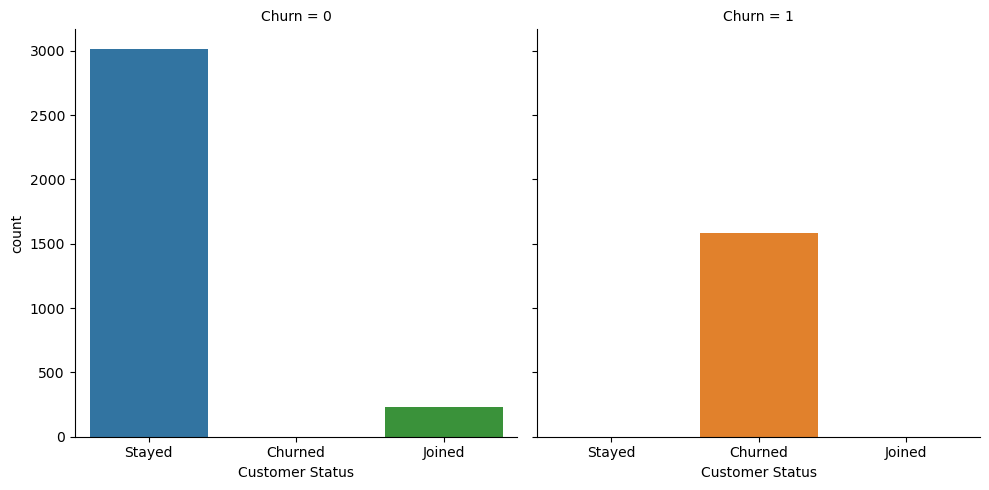

In [22]:
plt.figure(figsize=(12,4))

sns.catplot(data=df, x="Customer Status", col="Churn", kind="count")  

<Figure size 1200x400 with 0 Axes>

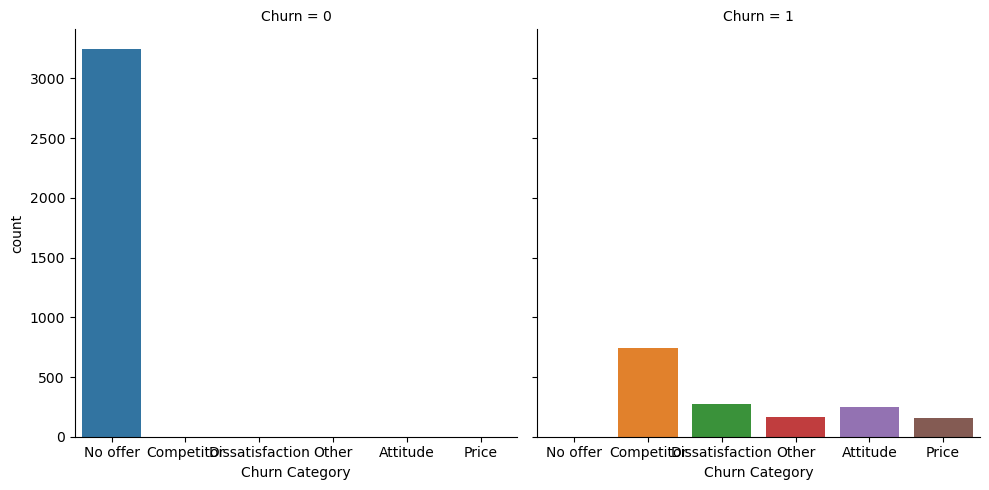

In [23]:
plt.figure(figsize=(12,4))

sns.catplot(data=df, x="Churn Category", col="Churn", kind="count")  

### Entendendo as variáveis, para seleciona-las para o modelo

#### Gênero por Churn

<Figure size 1200x400 with 0 Axes>

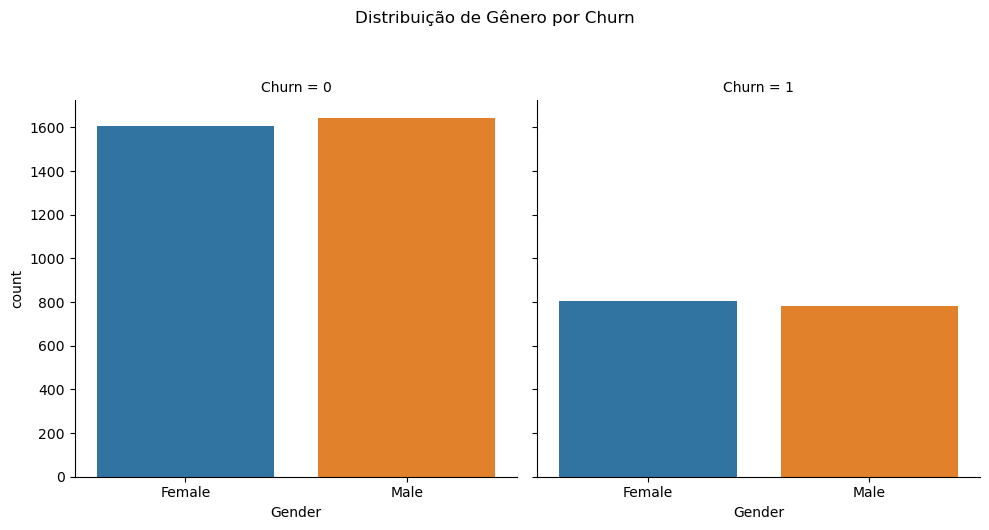

In [24]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Gender", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Gênero por Churn", y=1.05)
g.fig.tight_layout()

#### Estado Civil por Churn

<Figure size 1200x400 with 0 Axes>

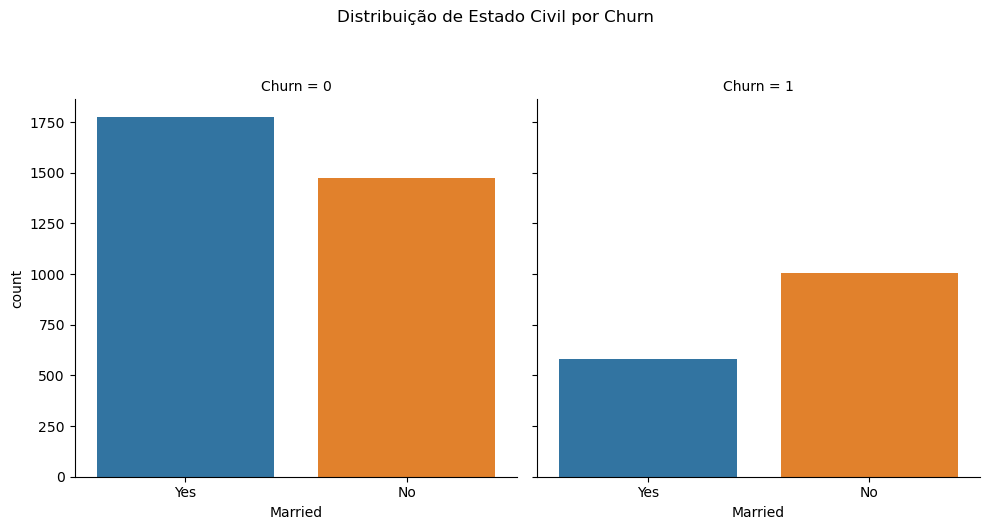

In [25]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Married", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Estado Civil por Churn", y=1.05)
g.fig.tight_layout()

#### N° dependentes por Churn

<Figure size 1200x400 with 0 Axes>

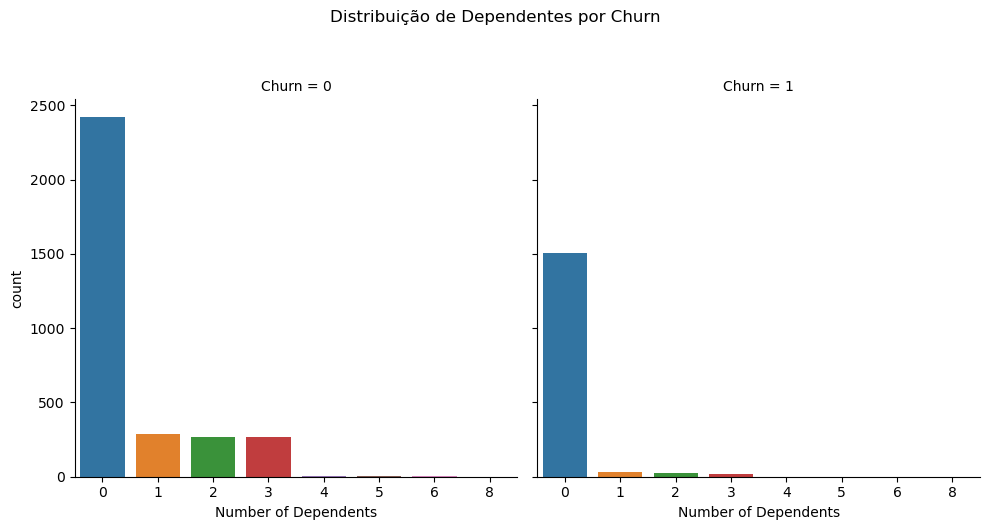

In [26]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Number of Dependents", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Dependentes por Churn", y=1.05)
g.fig.tight_layout()

#### N° Indicações por Churn

<Figure size 1200x400 with 0 Axes>

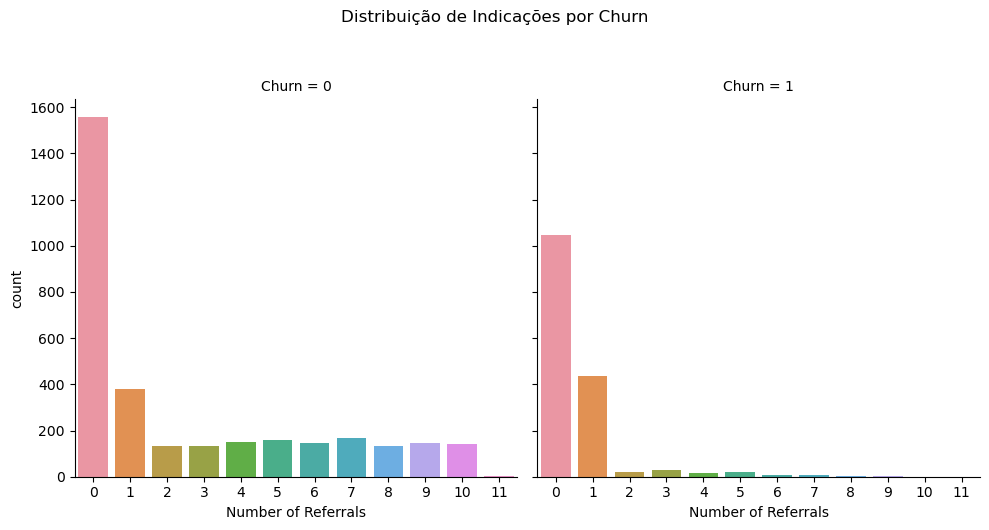

In [27]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Number of Referrals", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Indicações por Churn", y=1.05)
g.fig.tight_layout()

#### Tipo de Oferta por Churn

<Figure size 1200x400 with 0 Axes>

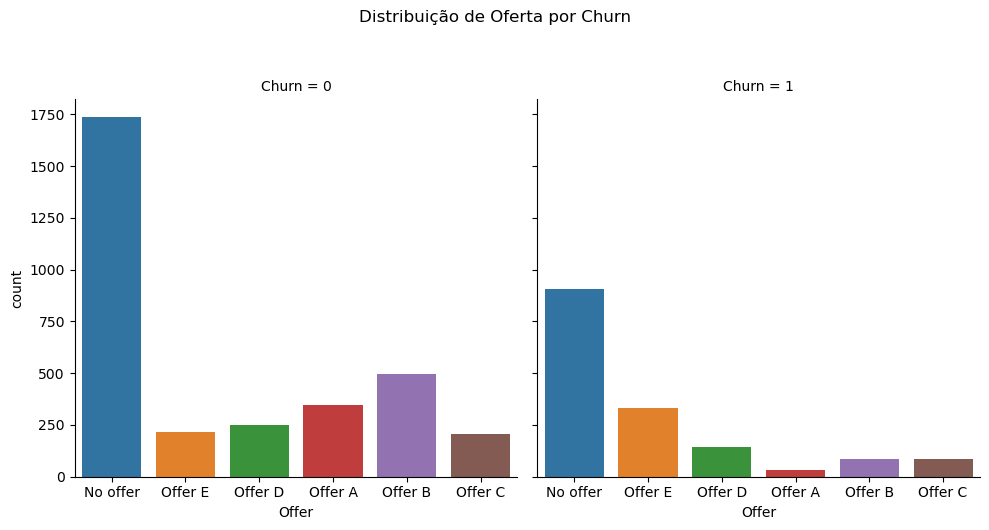

In [28]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Offer", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Oferta por Churn", y=1.05)
g.fig.tight_layout()

#### Serviço Telefônico por Churn

<Figure size 1200x400 with 0 Axes>

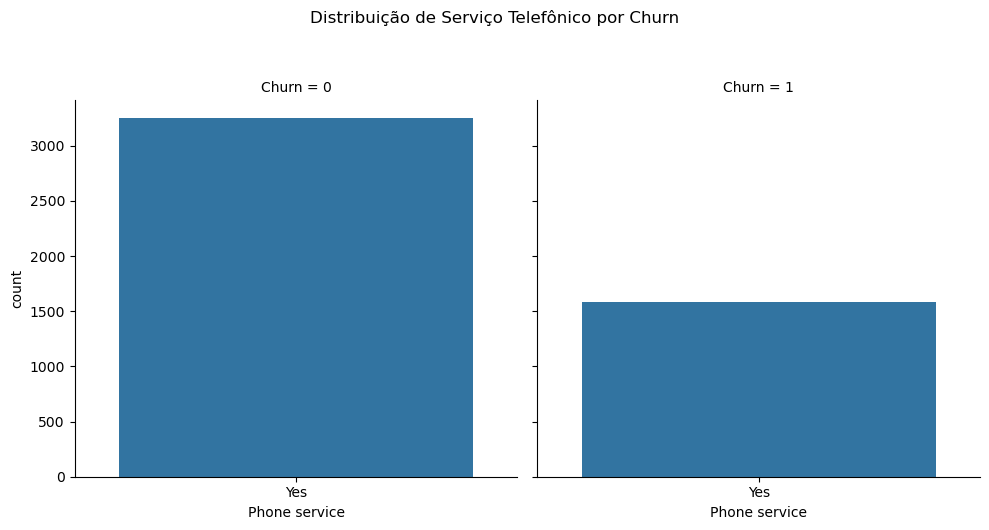

In [29]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Phone service", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Serviço Telefônico por Churn", y=1.05)
g.fig.tight_layout()

#### Mais de uma linha telefônica por Churn

<Figure size 1200x400 with 0 Axes>

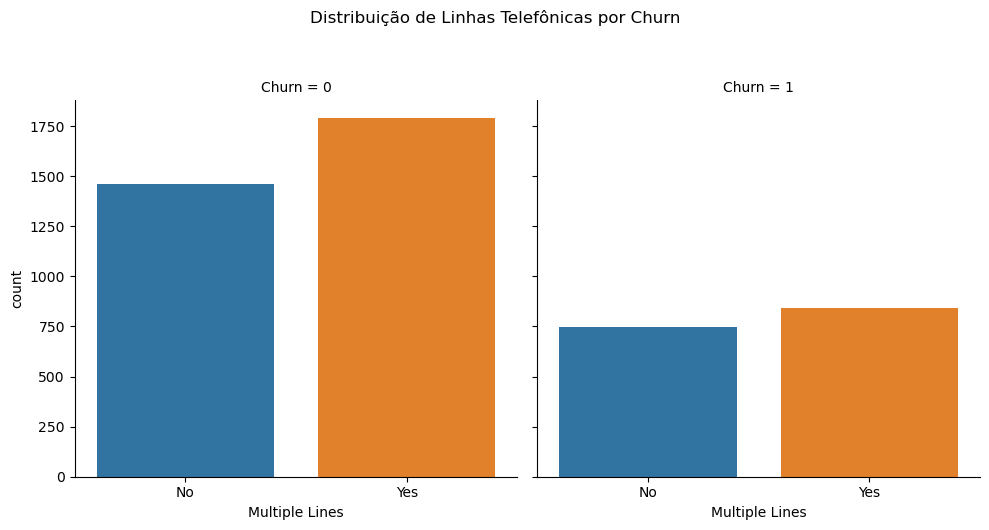

In [30]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Multiple Lines", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Linhas Telefônicas por Churn", y=1.05)
g.fig.tight_layout()

#### Serviço de Internet por Churn

<Figure size 1200x400 with 0 Axes>

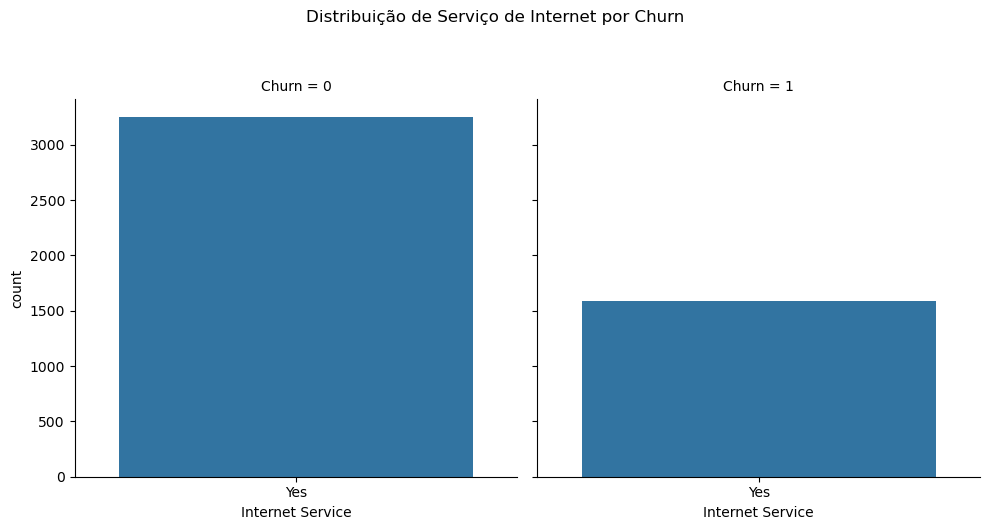

In [31]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Internet Service", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Serviço de Internet por Churn", y=1.05)
g.fig.tight_layout()

#### Tipo de Internet por Churn

<Figure size 1200x400 with 0 Axes>

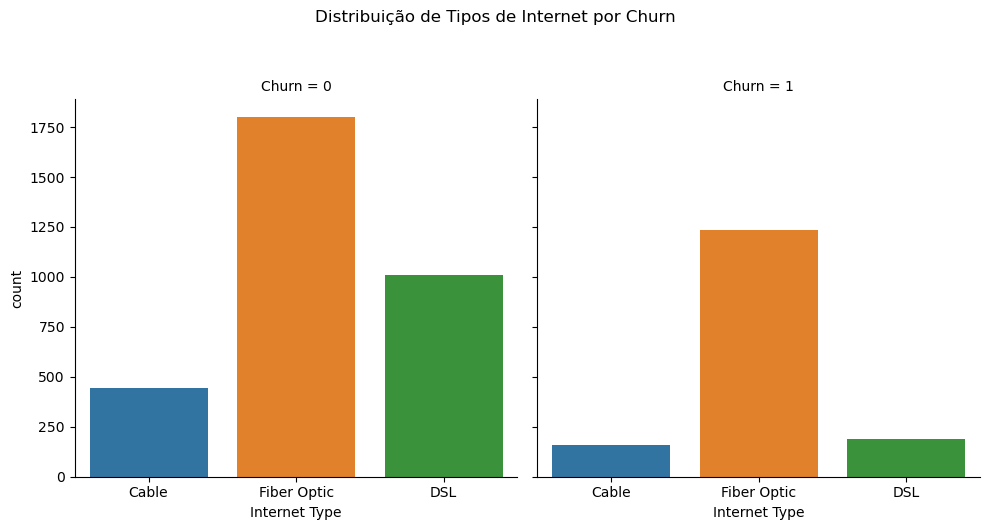

In [32]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Internet Type", col="Churn", kind="count") 
g.fig.suptitle("Distribuição de Tipos de Internet por Churn", y=1.05)
g.fig.tight_layout()

#### Segurança da Internet por Churn

<Figure size 1200x400 with 0 Axes>

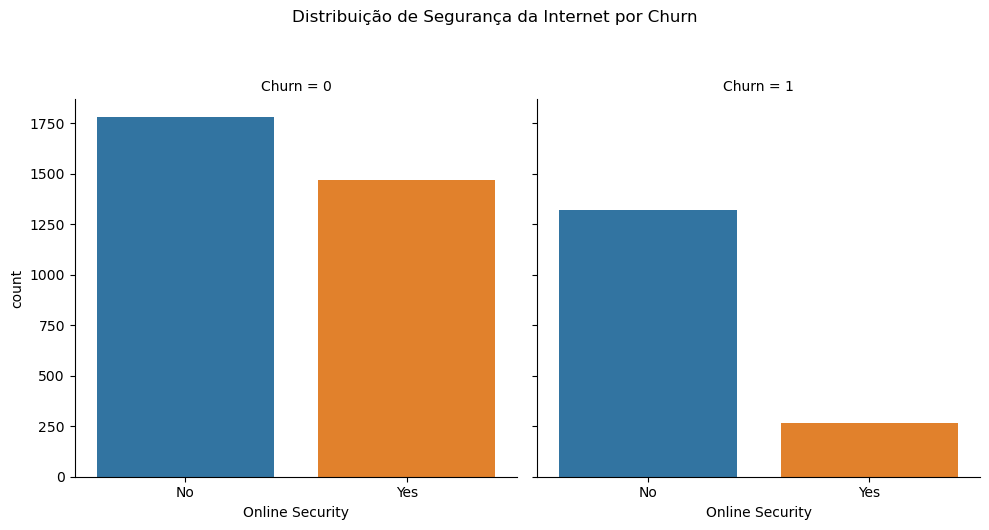

In [33]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Online Security", col="Churn", kind="count")
g.fig.suptitle("Distribuição de Segurança da Internet por Churn", y=1.05)
g.fig.tight_layout()

#### Backup Online por Churn

<Figure size 1200x400 with 0 Axes>

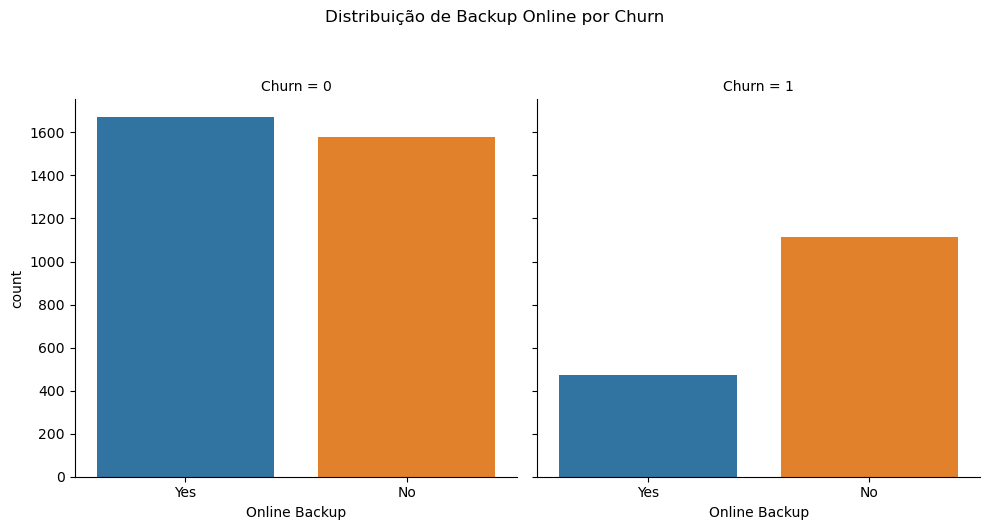

In [34]:
plt.figure(figsize=(12,4))

g= sns.catplot(data=df, x="Online Backup", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Backup Online por Churn", y=1.05)
g.fig.tight_layout()

#### Plano de Seguro de Telefone por Churn

<Figure size 1200x400 with 0 Axes>

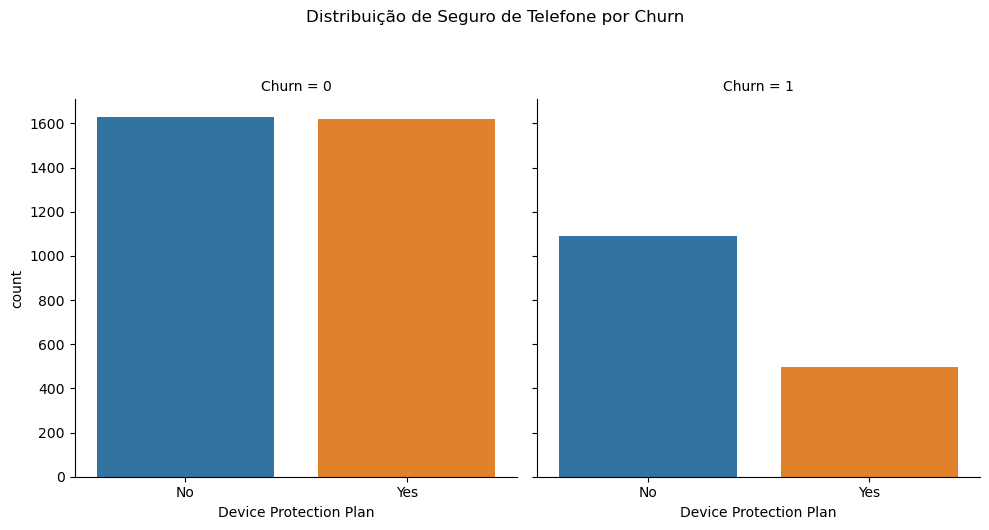

In [35]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Device Protection Plan", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Seguro de Telefone por Churn", y=1.05)
g.fig.tight_layout()

#### Suporte técnico Premium por Churn

<Figure size 1200x400 with 0 Axes>

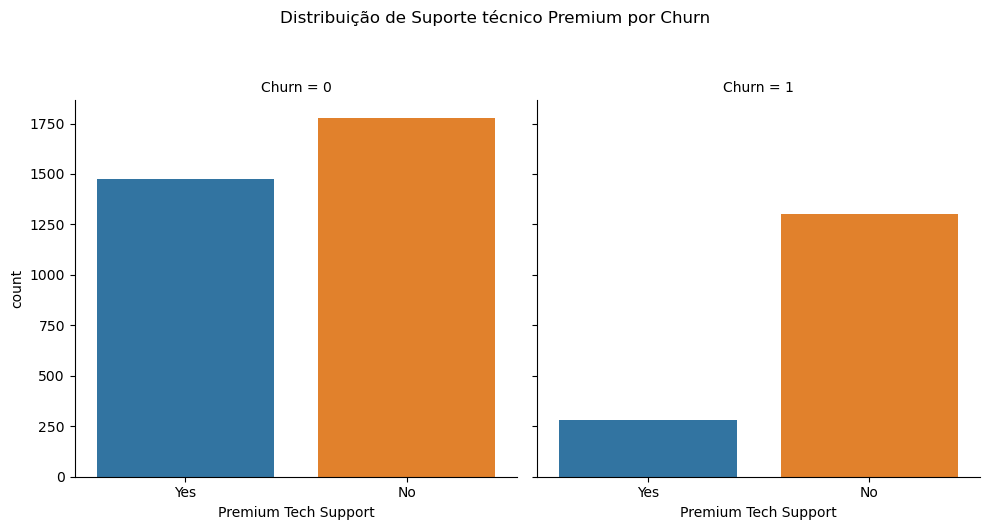

In [36]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Premium Tech Support", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Suporte técnico Premium por Churn", y=1.05)
g.fig.tight_layout()

#### Streamings de TV por Churn

<Figure size 1200x400 with 0 Axes>

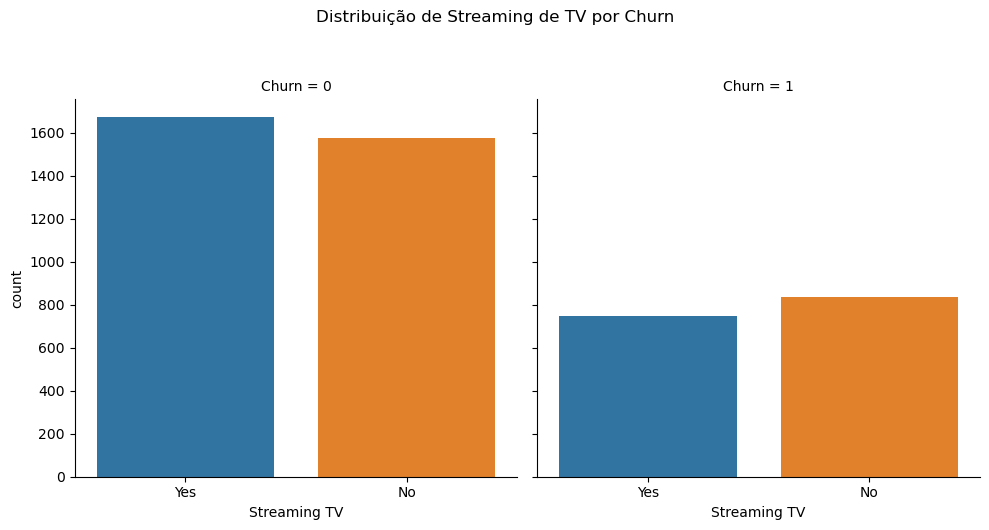

In [37]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Streaming TV", col="Churn", kind="count")
g.fig.suptitle("Distribuição de Streaming de TV por Churn", y=1.05)
g.fig.tight_layout()

#### Streaming de Filmes por Churn

<Figure size 1200x400 with 0 Axes>

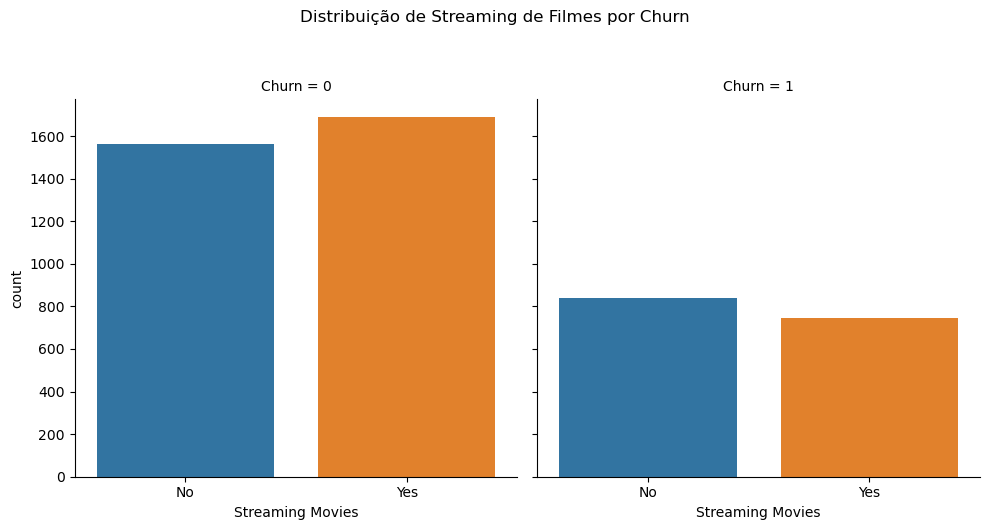

In [38]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Streaming Movies", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Streaming de Filmes por Churn", y=1.05)
g.fig.tight_layout()

#### Streaming de Música por Churn

<Figure size 1200x400 with 0 Axes>

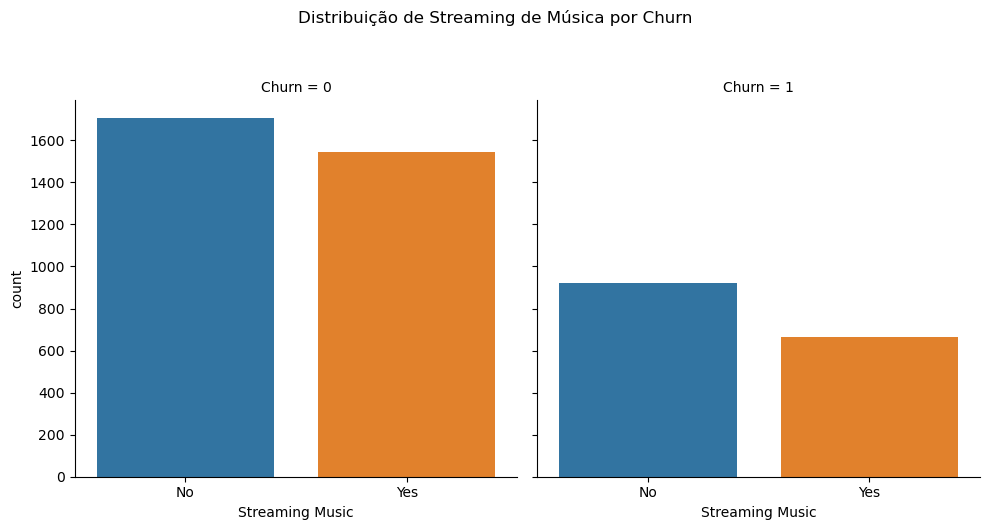

In [39]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Streaming Music", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Streaming de Música por Churn", y=1.05)
g.fig.tight_layout()

#### Dados Ilimitado por Churn

<Figure size 1200x400 with 0 Axes>

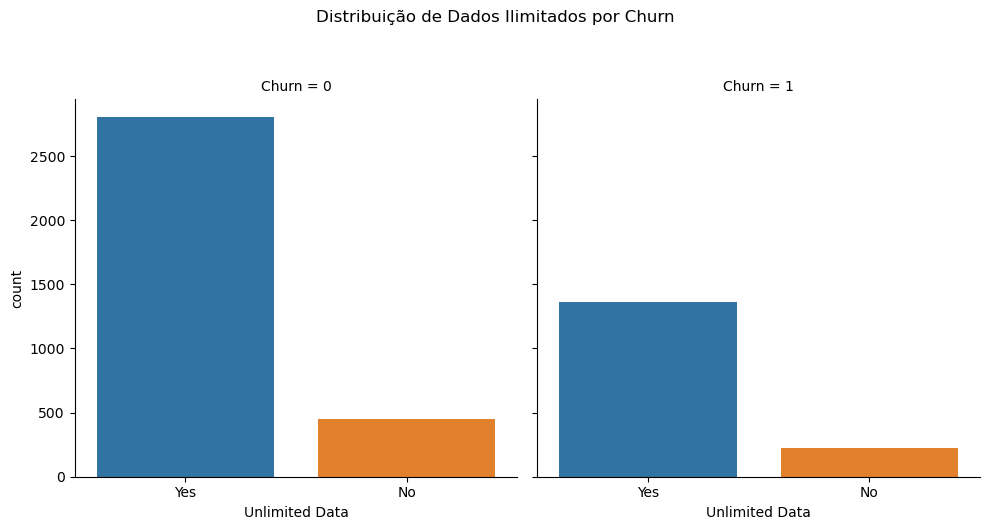

In [40]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Unlimited Data", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Dados Ilimitados por Churn", y=1.05)
g.fig.tight_layout()

#### Tipo de Contrato por Churn

<Figure size 1200x400 with 0 Axes>

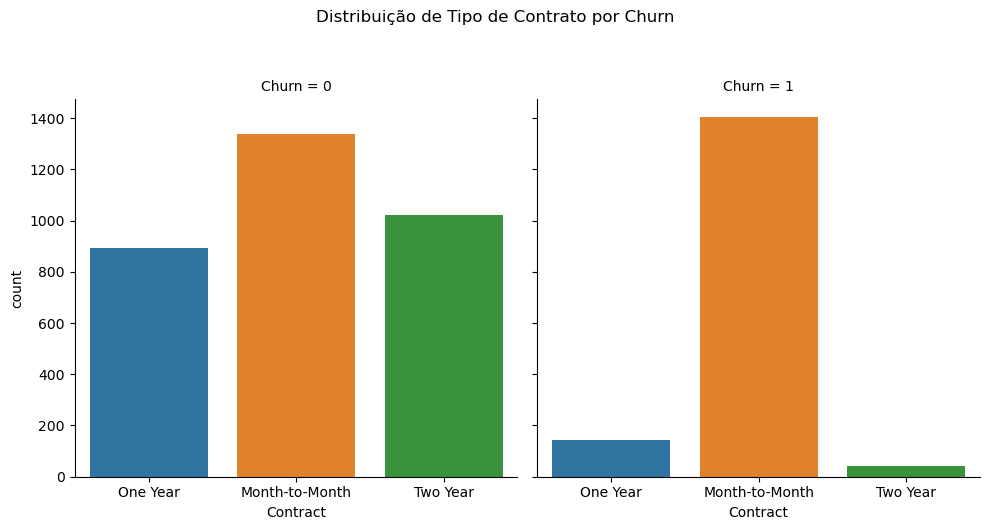

In [41]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Contract", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Tipo de Contrato por Churn", y=1.05)
g.fig.tight_layout()

#### Contas a Pagar por Meio Digital por Churn

<Figure size 1200x400 with 0 Axes>

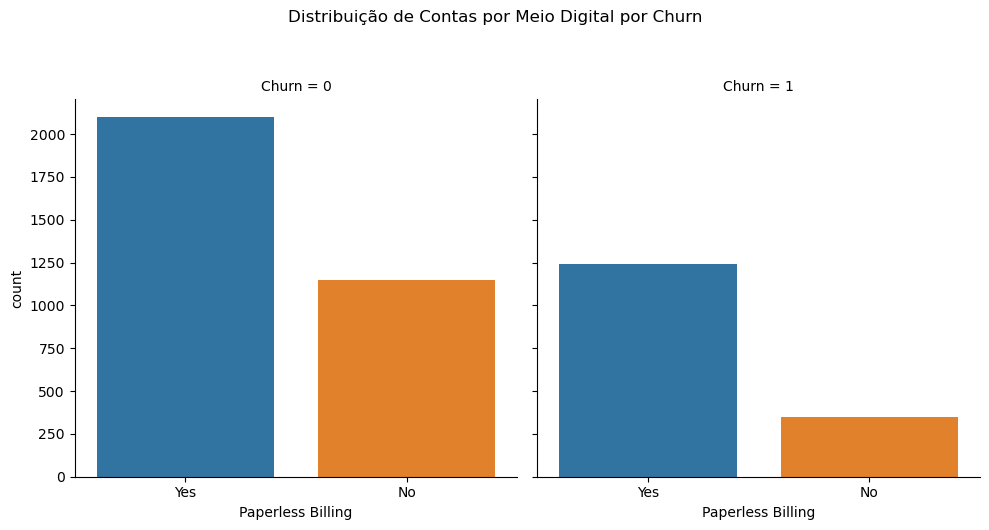

In [42]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Paperless Billing", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Contas por Meio Digital por Churn", y=1.05)
g.fig.tight_layout()

#### Método de pagamento por Churn

<Figure size 1200x400 with 0 Axes>

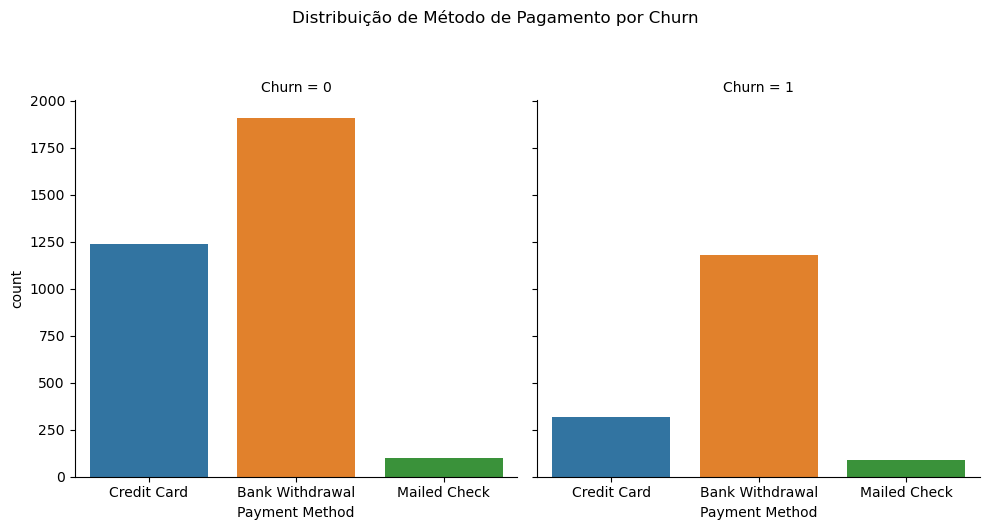

In [43]:
plt.figure(figsize=(12,4))

g = sns.catplot(data=df, x="Payment Method", col="Churn", kind="count")  
g.fig.suptitle("Distribuição de Método de Pagamento por Churn", y=1.05)
g.fig.tight_layout()

- **Há alta evidência de Churn:**
  - Estado Civil
  - N° Dependentes
  - N° indicações
  - Tipos de Ofertas
  - Tipo de Internet
  - Seguro de Internet
  - Backup Online
  - Seguro de Telefone
  - Suporte Técnico Premium
  - Dados ilimitados
  - Tipo do Contrato/Assinatura de Plano
  - Conta por Meios Digitais
  - Tipo de Pagamento

- **Há baixa evidência de Churn:**
  - Streaming de TV
  - Streaming de Filmes
  - Streaming de Música

- **Não implica em Churn:**
  - Gênero 
  - Multiplas Linhas

- **Inconclusivo quanto ao Churn:**
  - Serviço de telefone
  - Serviço de internet

## Seleção das variáveis

In [44]:
df_final = df.drop(['Customer ID', 'Gender', 'City', 'Zip Code', 'Latitude', 'Longtitude', 'Phone service', 'Multiple Lines', 'Internet Service', 
                    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Customer Status', 'Churn Category'], axis = 1)

In [45]:
df_final.head().T

,0,1,2,3,4
Age,37,46,50,78,75
Married,Yes,No,No,Yes,Yes
Number of Dependents,0,0,0,0,0
Number of Referrals,2,0,0,1,3
Tenure in Months,9,9,4,13,3
Offer,No offer,No offer,Offer E,Offer D,No offer
Average Monthly Long Distance Charges,0.0,0.0,33.65,27.82,0.0
Internet Type,Cable,Cable,Fiber Optic,Fiber Optic,Fiber Optic
Average Monthly GB Download,16.0,10.0,30.0,4.0,11.0
Online Security,No,No,No,No,No


In [46]:
df_final_dummies = pd.get_dummies(df_final, columns = ['Married', 'Offer', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 
                                                 'Premium Tech Support', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method'], drop_first= True)

In [47]:
df_final_dummies.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,37,46,50,78,75,23,67,52,68,43
Number of Dependents,0,0,0,0,0,3,0,0,0,1
Number of Referrals,2,0,0,1,3,0,1,8,0,3
Tenure in Months,9,9,4,13,3,9,71,63,7,65
Average Monthly Long Distance Charges,0.0,0.0,33.65,27.82,0.0,0.0,0.0,0.0,0.0,0.0
Average Monthly GB Download,16.0,10.0,30.0,4.0,11.0,73.0,14.0,7.0,21.0,14.0
Monthly Charge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.65,0.0,0.0
Total Charges,0.0,0.0,280.85,1237.85,0.0,0.0,0.0,0.0,0.0,0.0
Total Refunds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Extra Data Charges,0,10,0,0,0,0,0,20,0,0


## Modelagem

### Train Test Split

In [48]:
X = df_final_dummies.drop('Churn',axis=1)
y = df['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Modelos

#### Decision Tree

##### Usando GridSearchCV para achar bons parâmetros para o Decision Tree

In [74]:
dtree = DecisionTreeClassifier(random_state= 101)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
}

CV_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, verbose=True)
CV_dtree.fit(X_train, y_train)

dtree_best_model = CV_dtree.best_estimator_
dtree_best_model

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\lucas\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       max_features='auto', random_state=101)

##### Modelo final

In [72]:
dtree_final = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                                     max_features='sqrt', random_state=101)
dtree_final.fit(X_train,y_train)
dtree_final_predictions = dtree_final.predict(X_test)
print('Relatório de classificação: \n', classification_report(y_test,dtree_final_predictions), '\n'
      'Matriz de confusão: \n', confusion_matrix(y_test,dtree_final_predictions))

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       947
           1       0.68      0.70      0.69       504

    accuracy                           0.78      1451
   macro avg       0.76      0.76      0.76      1451
weighted avg       0.78      0.78      0.78      1451
 
Matriz de confusão: 
 [[783 164]
 [153 351]]


#### Random Forest

##### Usando GridSearchCV para achar bons parâmetros para o Random Forest

<bloquequote>Não há necessidade de realizar feature scaling em Random Forest, pois o algoritmo trabalha com particionamente recursivo<bloquequote>

In [78]:
rfc = RandomForestClassifier(random_state= 101)

param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose= True)
CV_rfc.fit(X_train, y_train)

rfc_best_model = CV_rfc.best_estimator_
rfc_best_model

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=150,
                       random_state=101)

##### Modelo Final

In [79]:
rfc_final=RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=150, random_state=101)
rfc_final.fit(X_train,y_train)
rfc_final_predictions = rfc_final.predict(X_test)
print('Relatório de classificação: \n \n', classification_report(y_test,rfc_final_predictions), '\n'
      'Matriz de confusão: \n', confusion_matrix(y_test,rfc_final_predictions), '\n \n'
      'Acurácia para Random Forest usando GridSearchCV: ',accuracy_score(y_test,rfc_final_predictions))

Relatório de classificação: 
 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       947
           1       0.76      0.65      0.70       504

    accuracy                           0.81      1451
   macro avg       0.80      0.77      0.78      1451
weighted avg       0.81      0.81      0.81      1451
 
Matriz de confusão: 
 [[845 102]
 [175 329]] 
 
Acurácia para Random Forest usando GridSearchCV:  0.8090971743625086
